In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## financial data

In [2]:
yahoo = pd.read_csv('stocknews/DJIA_table.csv',index_col='Date')

In [3]:
yahoo.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [4]:
yahoo.sort_index(ascending=True, inplace=True)

In [5]:
yahoo.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


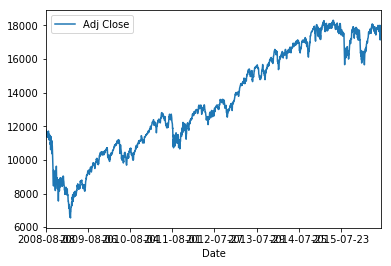

In [6]:
yahoo.ix[:,['Adj Close']].plot()

 ## Reddit

In [8]:
reddit = pd.read_csv('stocknews/Combined_News_DJIA.csv',index_col=['Date'])

# Using this split criteria, the train/test proportion is nearly 80/20
train = reddit[reddit.index < '2015-01-01']
test = reddit[reddit.index> '2014-12-31']

In [9]:
trainheadlines = []
for row in range(0,len(train.index)):
    trainheadlines.append(' '.join(str(x) for x in train.iloc[row,1:26]))

In [10]:
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,1:26]))


In [71]:
y_train = reddit.values[:,0][:len(train)].astype('int')
y_test = reddit.values[:,0][len(train):].astype('int')

## Topic Modeling

In [11]:
# Import various modules for string cleaning
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def review_to_wordlist( review, remove_stopwords=True ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review,'lxml').get_text()
    #  
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        stops.add('b')
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [12]:
train_vob = []  # Initialize an empty list of sentences
for review in trainheadlines:
    train_vob.append( review_to_wordlist(review, True))



In [13]:
test_vob = []
for review in testheadlines:
    test_vob.append( review_to_wordlist(review, True))

In [15]:
from gensim import corpora
dictionary = corpora.Dictionary(train_vob + test_vob)

In [16]:
corpus = [dictionary.doc2bow(doc) for doc in train_vob + test_vob]

In [23]:
import gensim
Lda = gensim.models.ldamodel.LdaModel

In [18]:
# 2 topics
ldamodel_2p = Lda(corpus, num_topics=2, id2word = dictionary, passes=20)


NameError: name 'ladmoel_2p' is not defined

In [20]:
ldamodel_2p.save('ldamodel_2p')

In [220]:
print(ldamodel_2p.print_topic(0,topn=10))

0.005*"us" + 0.004*"new" + 0.004*"china" + 0.004*"government" + 0.003*"says" + 0.003*"police" + 0.003*"world" + 0.003*"u" + 0.003*"people" + 0.003*"israel"


In [219]:
import pyLDAvis.gensim
pyLDAvis.display(pyLDAvis.gensim.prepare(ldamodel_2p, corpus, dictionary,R=5,plot_opts=False))

In [61]:
# 20 topics
ldamodel1 = Lda(corpus, num_topics=20, id2word = dictionary, passes=20)

ldamodel1.save('ldamodel1')

In [24]:
ldamodel_20p = Lda.load('ldamodel1')

In [316]:
# 10 topics
ldamodel2 = Lda(corpus, num_topics=10, id2word = dictionary, passes=20)

ldamodel2.save('ldamodel2')

In [25]:
ldamodel_10p = Lda.load('ldamodel2')

In [578]:
# 30 topics
ldamodel3 = Lda(corpus, num_topics=30, id2word = dictionary, passes=20)

ldamodel3.save('ldamodel3')

In [26]:
ldamodel_30p = Lda.load('ldamodel3')

In [27]:
train_doc = [dictionary.doc2bow(doc) for doc in train_vob]
test_doc = [dictionary.doc2bow(doc) for doc in test_vob]

## Four data sets 2/10/20/30 topics

In [30]:
X_train2p=np.zeros((len(train_doc),2))
for i in range(len(train_doc)):
    for it in ldamodel_2p[train_doc[i]]:
        X_train2p[i,it[0]]=it[1]

In [34]:
X_test2p=np.zeros((len(test_doc),2))
for i in range(len(test_doc)):
    for it in ldamodel_2p[test_doc[i]]:
        X_test2p[i,it[0]]=it[1]

In [32]:
X_train10p=np.zeros((len(train_doc),10))
for i in range(len(train_doc)):
    for it in ldamodel_10p[train_doc[i]]:
        X_train10p[i,it[0]]=it[1]

In [33]:
X_test10p=np.zeros((len(test_doc),10))
for i in range(len(test_doc)):
    for it in ldamodel_10p[test_doc[i]]:
        X_test10p[i,it[0]]=it[1]

In [35]:
X_train20p=np.zeros((len(train_doc),20))
for i in range(len(train_doc)):
    for it in ldamodel_20p[train_doc[i]]:
        X_train20p[i,it[0]]=it[1]

In [36]:
X_test20p=np.zeros((len(test_doc),20))
for i in range(len(test_doc)):
    for it in ldamodel_20p[test_doc[i]]:
        X_test20p[i,it[0]]=it[1]

In [37]:
X_train30p=np.zeros((len(train_doc),30))
for i in range(len(train_doc)):
    for it in ldamodel_30p[train_doc[i]]:
        X_train30p[i,it[0]]=it[1]

In [38]:
X_test30p=np.zeros((len(test_doc),30))
for i in range(len(test_doc)):
    for it in ldamodel_30p[test_doc[i]]:
        X_test30p[i,it[0]]=it[1]

### logistic Regression

In [266]:

print()
print('2 topics')
print(roc_auc_score(y_test, LogisticRegression().fit(X_train2p,y_train).predict_proba(X_test2p)[:,1]))
print(accuracy_score(LogisticRegression().fit(X_train2p,y_train).predict(X_test2p),y_test))

print()
print('10 topics')
print(roc_auc_score(y_test, LogisticRegression().fit(X_train10p,y_train).predict_proba(X_test10p)[:,1]))
print(accuracy_score(LogisticRegression().fit(X_train10p,y_train).predict(X_test10p),y_test))

print()
print('20 topics')
print(roc_auc_score(y_test, LogisticRegression().fit(X_train20p,y_train).predict_proba(X_test20p)[:,1]))
print(accuracy_score(LogisticRegression().fit(X_train20p,y_train).predict(X_test20p),y_test))

print()
print('30 topics')
print(roc_auc_score(y_test, LogisticRegression().fit(X_train30p,y_train).predict_proba(X_test30p)[:,1]))
print(accuracy_score(LogisticRegression().fit(X_train30p,y_train).predict(X_test30p),y_test))


2 topics
0.498291890681
0.507936507937

10 topics
0.50966061828
0.507936507937

20 topics
0.510976702509
0.5

30 topics
0.510640681004
0.515873015873


### SVM

In [267]:
# SVM
print()
print('2 topics')
print(roc_auc_score(y_test, SVC(probability=True).fit(X_train2p,y_train).predict_proba(X_test2p)[:,1]))
print(accuracy_score(SVC(probability=True).fit(X_train2p,y_train).predict(X_test2p),y_test))

print()
print('10 topics')
print(roc_auc_score(y_test, SVC(probability=True).fit(X_train10p,y_train).predict_proba(X_test10p)[:,1]))
print(accuracy_score(SVC(probability=True).fit(X_train10p,y_train).predict(X_test10p),y_test))

print()
print('20 topics')
print(roc_auc_score(y_test, SVC(probability=True).fit(X_train20p,y_train).predict_proba(X_test20p)[:,1]))
print(accuracy_score(SVC(probability=True).fit(X_train20p,y_train).predict(X_test20p),y_test))

print()
print('30 topics')
print(roc_auc_score(y_test, SVC(probability=True).fit(X_train30p,y_train).predict_proba(X_test30p)[:,1]))
print(accuracy_score(SVC(probability=True).fit(X_train30p,y_train).predict(X_test30p),y_test))


2 topics
0.502352150538
0.507936507937

10 topics
0.486503136201
0.507936507937

20 topics
0.525313620072
0.507936507937

30 topics
0.449372759857
0.507936507937


### Random Forest

In [269]:
# Random Forest
print()
print('2 topics')
print(roc_auc_score(y_test, RandomForestClassifier(random_state=0).fit(X_train2p,y_train).predict_proba(X_test2p)[:,1]))
print(accuracy_score(RandomForestClassifier(random_state=0).fit(X_train2p,y_train).predict(X_test2p),y_test))

print()
print('10 topics')
print(roc_auc_score(y_test, RandomForestClassifier(random_state=0).fit(X_train10p,y_train).predict_proba(X_test10p)[:,1]))
print(accuracy_score(RandomForestClassifier(random_state=0).fit(X_train10p,y_train).predict(X_test10p),y_test))

print()
print('20 topics')
print(roc_auc_score(y_test, RandomForestClassifier(random_state=0).fit(X_train20p,y_train).predict_proba(X_test20p)[:,1]))
print(accuracy_score(RandomForestClassifier(random_state=0).fit(X_train20p,y_train).predict(X_test20p),y_test))

print()
print('30 topics')
print(roc_auc_score(y_test, RandomForestClassifier(random_state=0).fit(X_train30p,y_train).predict_proba(X_test30p)[:,1]))
print(accuracy_score(RandomForestClassifier(random_state=0).fit(X_train30p,y_train).predict(X_test30p),y_test))


2 topics
0.511900761649
0.510582010582

10 topics
0.474308355735
0.489417989418

20 topics
0.455393145161
0.465608465608

30 topics
0.477766577061
0.468253968254


### Gradient Boost

In [270]:
# GBM
print()
print('2 topics')
print(roc_auc_score(y_test, GradientBoostingClassifier(random_state=0).fit(X_train2p,y_train).predict_proba(X_test2p)[:,1]))
print(accuracy_score(GradientBoostingClassifier(random_state=0).fit(X_train2p,y_train).predict(X_test2p),y_test))

print()
print('10 topics')
print(roc_auc_score(y_test, GradientBoostingClassifier(random_state=0).fit(X_train10p,y_train).predict_proba(X_test10p)[:,1]))
print(accuracy_score(GradientBoostingClassifier(random_state=0).fit(X_train10p,y_train).predict(X_test10p),y_test))

print()
print('20 topics')
print(roc_auc_score(y_test, GradientBoostingClassifier(random_state=0).fit(X_train20p,y_train).predict_proba(X_test20p)[:,1]))
print(accuracy_score(GradientBoostingClassifier(random_state=0).fit(X_train20p,y_train).predict(X_test20p),y_test))

print()
print('30 topics')
print(roc_auc_score(y_test, GradientBoostingClassifier(random_state=0).fit(X_train30p,y_train).predict_proba(X_test30p)[:,1]))
print(accuracy_score(GradientBoostingClassifier(random_state=0).fit(X_train30p,y_train).predict(X_test30p),y_test))


2 topics
0.533994175627
0.539682539683

10 topics
0.484711021505
0.486772486772

20 topics
0.484459005376
0.52380952381

30 topics
0.476072468638
0.513227513228


### KNN

In [271]:
from sklearn.neighbors import KNeighborsClassifier
# KNN 
print()
print('2 topics')
print(roc_auc_score(y_test, KNeighborsClassifier().fit(X_train2p,y_train).predict_proba(X_test2p)[:,1]))
print(accuracy_score(KNeighborsClassifier().fit(X_train2p,y_train).predict(X_test2p),y_test))

print()
print('10 topics')
print(roc_auc_score(y_test, KNeighborsClassifier().fit(X_train10p,y_train).predict_proba(X_test10p)[:,1]))
print(accuracy_score(KNeighborsClassifier().fit(X_train10p,y_train).predict(X_test10p),y_test))

print()
print('20 topics')
print(roc_auc_score(y_test, KNeighborsClassifier().fit(X_train20p,y_train).predict_proba(X_test20p)[:,1]))
print(accuracy_score(KNeighborsClassifier().fit(X_train20p,y_train).predict(X_test20p),y_test))

print()
print('30 topics')
print(roc_auc_score(y_test, KNeighborsClassifier().fit(X_train30p,y_train).predict_proba(X_test30p)[:,1]))
print(accuracy_score(KNeighborsClassifier().fit(X_train30p,y_train).predict(X_test30p),y_test))


2 topics
0.536108310932
0.518518518519

10 topics
0.487049171147
0.507936507937

20 topics
0.460769489247
0.484126984127

30 topics
0.507322468638
0.502645502646


### Tune random forest

In [74]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import confusion_matrix

In [264]:
def tune_rf(X,y,X_validation,y_validation,gen_plot=False):
            
    grid = ParameterGrid({
                'min_samples_leaf':[1,3,5],
                'n_estimators':[10,30]})
    auc_all = []
    models=[]
    acc_all=[]
    for params in grid:
        randomforest = RandomForestClassifier(random_state=0,n_jobs=-1,bootstrap=False,**params)
        tscv = TimeSeriesSplit(n_splits=3)
        models.append(randomforest)
        inner_acc=[]
        inner_roc=[]
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            ypred=randomforest.fit(X_train,y_train).predict_proba(X_test)[:,1]
            ypred_c=randomforest.fit(X_train,y_train).predict(X_test)

            acc = accuracy_score(y_test.ravel(),ypred_c.ravel())
            inner_acc.append(acc)
            fpr, tpr, _ = roc_curve(y_test.ravel(), ypred.ravel())
            roc_auc = auc(fpr,tpr)
            inner_roc.append(roc_auc)
        
        auc_all.append(np.mean(inner_roc))
        acc_all.append(np.mean(inner_acc))

    print(auc_all)
    idx = np.argmax(auc_all)
    best_params = grid[idx]    
    estimator = models[idx]
    print('Time Series Cross Validation:')
    print('Best parameter: ' + str(best_params))
    print('Best Accuracy:' + str(np.max(acc_all)))

    print(estimator)
    
    
    ypred=estimator.fit(X,y).predict_proba(X_validation)[:,1]
    ypred_c= estimator.fit(X,y).predict(X_validation)
    acc = accuracy_score(y_validation.ravel(),ypred_c.ravel())
    fpr, tpr, _ = roc_curve(y_validation.ravel(), ypred.ravel())
    roc_auc = auc(fpr,tpr)
    print('Validation Set:')
    print('Best Accuracy:' + str(acc))
    print('Confusion Matrix:')
    print(confusion_matrix(y_validation.ravel(),ypred_c.ravel()))


    if gen_plot:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange',
                 lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('ROC curve')
        plt.legend(loc='lower right')
        plt.show()

Time Series Cross Validation:
Best parameter: {'n_estimators': 100, 'min_samples_leaf': 3, 'max_depth': 8}
Best Accuracy:0.53399668325
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
Validation Set:
Best Accuracy:0.526455026455
Confusion Matrix:
[[ 47 139]
 [ 40 152]]


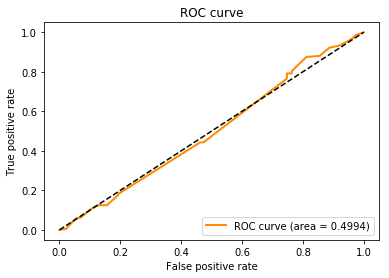

In [103]:
# 2 topics
tune_rf(X_train2p,y_train,X_test2p,y_test,True)

Time Series Cross Validation:
Best parameter: {'n_estimators': 50, 'min_samples_leaf': 3, 'max_depth': 8}
Best Accuracy:0.519071310116
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
Validation Set:
Best Accuracy:0.5
Confusion Matrix:
[[ 11 175]
 [ 14 178]]


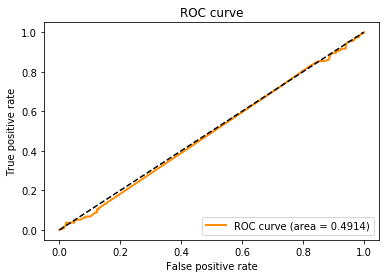

In [104]:
# 10 topics
tune_rf(X_train10p,y_train,X_test10p,y_test,True)

Time Series Cross Validation:
Best parameter: {'n_estimators': 100, 'min_samples_leaf': 5, 'max_depth': 2}
Best Accuracy:0.530679933665
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
Validation Set:
Best Accuracy:0.513227513228
Confusion Matrix:
[[  4 182]
 [  2 190]]


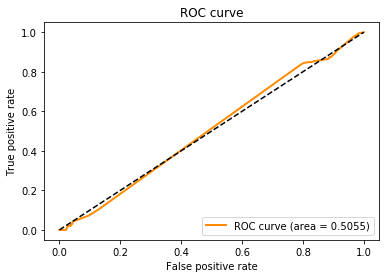

In [105]:
# 20 topics
tune_rf(X_train20p,y_train,X_test20p,y_test,True)

Time Series Cross Validation:
Best parameter: {'n_estimators': 50, 'min_samples_leaf': 3, 'max_depth': 2}
Best Accuracy:0.54311774461
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
Validation Set:
Best Accuracy:0.507936507937
Confusion Matrix:
[[  2 184]
 [  2 190]]


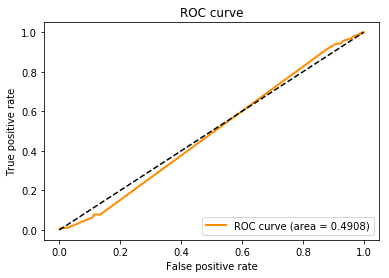

In [106]:
# 30 topics
tune_rf(X_train30p,y_train,X_test30p,y_test,True)

### Tune SVM

In [119]:
from sklearn.svm import SVC

def tune_svm(X,y, X_validation, y_validation,gen_plot=False):
   
    grid = ParameterGrid({'C':np.linspace(0.01,10,100)})
    auc_all = []
    models=[]

    acc_all=[]
    for params in grid:
        svm = SVC(random_state=1,probability=True, **params)
        tscv = TimeSeriesSplit(n_splits=3)
        models.append(svm)
        inner_acc=[]
        inner_roc=[]
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            ypred=svm.fit(X_train,y_train).predict_proba(X_test)[:,1]
            
            acc = accuracy_score(y_test.ravel(),1*(ypred>0.5).ravel())
            inner_acc.append(acc)
            fpr, tpr, _ = roc_curve(y_test.ravel(), ypred.ravel())
            roc_auc = auc(fpr,tpr)
            inner_roc.append(roc_auc)

        auc_all.append(np.mean(inner_roc))
        acc_all.append(np.mean(inner_acc))


    idx = np.argmax(auc_all)
    best_params = grid[idx]    
    estimator = models[idx]
    print('Time Series Cross Validation:')
    print('Best parameter: ' + str(best_params))
    print('Best Accuracy:' + str(np.max(acc_all)))

    print(estimator)
    
    
    ypred=estimator.fit(X,y).predict_proba(X_validation)[:,1]
    acc = accuracy_score(y_validation.ravel(),1*(ypred>0.5).ravel())
    fpr, tpr, _ = roc_curve(y_validation.ravel(), ypred.ravel(), pos_label=1)
    roc_auc = auc(fpr,tpr)
    print('Validation:')
    print('Best Accuracy:' + str(acc))


    if gen_plot:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange',
                 lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('ROC curve')
        plt.legend(loc='lower right')
        plt.show()

Time Series Cross Validation:
Best parameter: {'C': 3.0372727272727271}
Best Accuracy:0.544776119403
SVC(C=3.0372727272727271, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
  verbose=False)
Validation:
Best Accuracy:0.507936507937


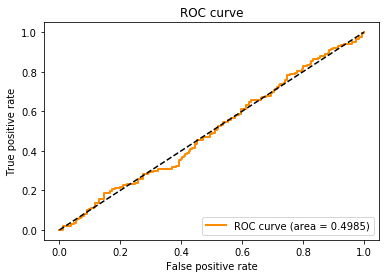

In [114]:
# 2 topic
tune_svm(X_train2p,y_train,X_test2p,y_test,True)

Time Series Cross Validation:
Best parameter: {'C': 0.01}
Best Accuracy:0.549751243781
SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
  verbose=False)
Validation:
Best Accuracy:0.507936507937


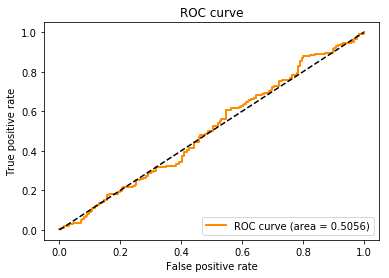

In [115]:
# 10 topics
tune_svm(X_train10p,y_train,X_test10p,y_test,True)

Time Series Cross Validation:
Best parameter: {'C': 0.01}
Best Accuracy:0.548092868988
SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
  verbose=False)
Validation:
Best Accuracy:0.510582010582


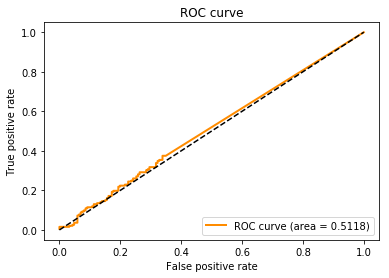

In [116]:
# 20 topics
tune_svm(X_train20p,y_train,X_test20p,y_test,True)

Time Series Cross Validation:
Best parameter: {'C': 9.6972727272727273}
Best Accuracy:0.544776119403
SVC(C=9.6972727272727273, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
  verbose=False)
Validation:
Best Accuracy:0.507936507937


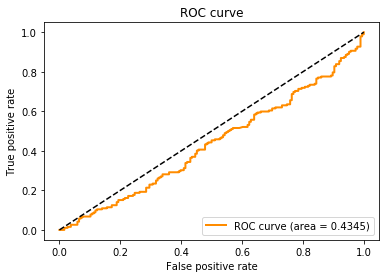

In [120]:
# 30 topics
tune_svm(X_train30p,y_train,X_test30p,y_test,True)

### Tune Gradient Boosting

In [249]:
from sklearn.ensemble import GradientBoostingClassifier

def tune_gbm(X,y,X_validation,y_validation,gen_plot=False):
            
    grid = ParameterGrid({'learning_rate':[0.05,0.1,0.2],
        'max_depth':[3,5,7],'n_estimators':[150,100],
                })
    auc_all = []
    models=[]
    acc_all=[]
    for params in grid:
        gbm = GradientBoostingClassifier(random_state=0,**params)
        tscv = TimeSeriesSplit(n_splits=5)
        models.append(gbm)
        inner_acc=[]
        inner_roc=[]
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
           
            ypred=gbm.fit(X_train,y_train).predict_proba(X_test)[:,1]

            acc = accuracy_score(y_test.ravel(),1*(ypred>0.5).ravel())
            inner_acc.append(acc)
            fpr, tpr, _ = roc_curve(y_test.ravel(), ypred.ravel())
            roc_auc = auc(fpr,tpr)
            inner_roc.append(roc_auc)
        
        auc_all.append(np.mean(inner_roc))
        acc_all.append(np.mean(inner_acc))

    idx = np.argmax(auc_all)
    best_params = grid[idx]    
    estimator = models[idx]
    print('Time Series Cross Validation:')
    print('Best parameter: ' + str(best_params))
    print('Best Accuracy:' + str(np.max(acc_all)))
    print('Best ROC:' + str(np.max(auc_all)))

    print(estimator)
    
    
    ypred=estimator.fit(X,y).predict_proba(X_validation)[:,1]
    acc = accuracy_score(y_validation.ravel(),1*(ypred>0.5).ravel())
    fpr, tpr, _ = roc_curve(y_validation.ravel(), ypred.ravel())
    roc_auc = auc(fpr,tpr)

    print('Validation Set:')
    print('Best Accuracy:' + str(acc))



    if gen_plot:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange',
                 lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('ROC curve')
        plt.legend(loc='lower right')
        plt.show()

Time Series Cross Validation:
Best parameter: {'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.05}
Best Accuracy:0.512686567164
Best ROC:0.509192370351
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=150, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)
Validation Set:
Best Accuracy:0.5


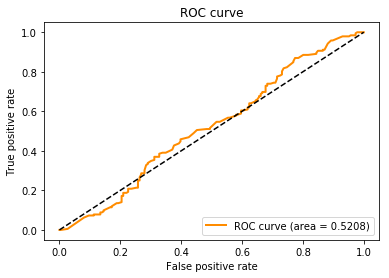

In [272]:
# 2 topic
tune_gbm(X_train2p,y_train,X_test2p,y_test,True)

### Tune KNN

In [369]:
def tune_knn(X,y,X_validation,y_validation,gen_plot=False):
            
    grid = ParameterGrid({'n_neighbors':[3,5,7,9,11,13,15],
        'p':[1,2,99],'weights':['uniform','distance'],
                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']})
    auc_all = []
    models=[]
    acc_all=[]
    for params in grid:
        knn = KNeighborsClassifier(**params)
        tscv = TimeSeriesSplit(n_splits=5)
        models.append(knn)
        inner_acc=[]
        inner_roc=[]
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
           
            ypred=knn.fit(X_train,y_train).predict_proba(X_test)[:,1]

            acc = accuracy_score(y_test.ravel(),1*(ypred>0.5).ravel())
            inner_acc.append(acc)
            fpr, tpr, _ = roc_curve(y_test.ravel(), ypred.ravel())
            roc_auc = auc(fpr,tpr)
            inner_roc.append(roc_auc)
        
        auc_all.append(np.mean(inner_roc))
        acc_all.append(np.mean(inner_acc))
    plt.figure()
    plt.hist(auc_all)
    plt.xlabel('ROC-AUC score')
    plt.ylabel('Count')
    plt.title('Histogram of Cross-Validation Results')
    idx = np.argmax(auc_all)
    best_params = grid[idx]    
    estimator = models[idx]
    print('Time Series Cross Validation:')
    print('Best parameter: ' + str(best_params))
    print('Best Accuracy:' + str(np.max(acc_all)))
    print('Best ROC:' + str(np.max(auc_all)))

    print(estimator)
    
    
    ypred=estimator.fit(X,y).predict_proba(X_validation)[:,1]
    acc = accuracy_score(y_validation.ravel(),1*(ypred>0.5).ravel())
    fpr, tpr, _ = roc_curve(y_validation.ravel(), ypred.ravel())
    roc_auc = auc(fpr,tpr)

    print('Validation Set:')
    print('Best Accuracy:' + str(acc))



    if gen_plot:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange',
                 lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('ROC curve')
        plt.legend(loc='lower right')
        plt.show()

Time Series Cross Validation:
Best parameter: {'weights': 'distance', 'p': 99, 'n_neighbors': 3, 'algorithm': 'auto'}
Best Accuracy:0.50223880597
Best ROC:0.505192625154
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=99,
           weights='distance')
Validation Set:
Best Accuracy:0.550264550265


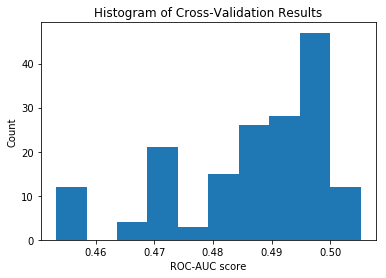

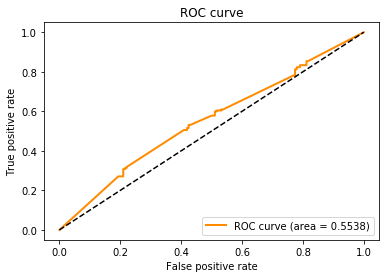

In [370]:
# 2 topic
tune_knn(X_train2p,y_train,X_test2p,y_test,True)



# PUSH the limit of Technical Analysis

In [366]:
def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    fig, ax = plt.subplots()
    ax = df.plot(title=title)
    fig.autofmt_xdate()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()
    
def sma(df,lookback=14,gen_plot=True):
    sma = df.copy()
    avg =pd.rolling_mean(sma,window=lookback,min_periods=lookback)
    sma = sma / avg
    if gen_plot==True:
        plot_data(sma, title='Moving Average',ylabel=' Price/Moving-Average')
    
    return sma

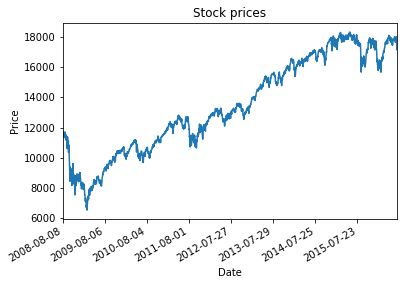

In [367]:
plot_data(yahoo['Adj Close'])

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=14,min_periods=14,center=False).mean()


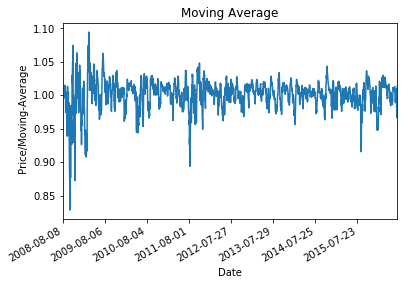

In [368]:
x_yahoo = sma(yahoo['Adj Close'])


In [307]:
x_yahoo_train = x_yahoo[:len(train)].values.reshape(-1,1)
x_yahoo_test = x_yahoo[len(train):].values.reshape(-1,1)

In [316]:
# GBM
print()
print('2 topics')
print(roc_auc_score(y_test, GradientBoostingClassifier(random_state=0).fit(x_yahoo_train[13:,:],y_train[13:]).predict_proba(x_yahoo_test)[:,1]))
print(accuracy_score(GradientBoostingClassifier(random_state=0).fit(x_yahoo_train[13:,:],y_train[13:]).predict(x_yahoo_test),y_test))



2 topics
0.676397289427
0.621693121693


In [317]:
# GBM
print()
print('2 topics')
print(roc_auc_score(y_test, GradientBoostingClassifier(random_state=0).fit(np.concatenate([X_train2p,x_yahoo_train],axis=1)[13:,:],\
                                                       y_train[13:]).predict_proba(np.concatenate([X_test2p,x_yahoo_test],axis=1))[:,1]))
print(accuracy_score(GradientBoostingClassifier(random_state=0).fit(np.concatenate([X_train2p,x_yahoo_train],axis=1)[13:,:],\
                                                y_train[13:]).predict(np.concatenate([X_test2p,x_yahoo_test],axis=1)),y_test))



2 topics
0.691630264337
0.645502645503


In [348]:
fpr1, tpr1, _ =roc_curve(y_test, GradientBoostingClassifier(random_state=6740).fit(x_yahoo_train[13:,:],y_train[13:]).predict_proba(x_yahoo_test)[:,1])
roc_auc1 = auc(fpr1,tpr1)
fpr2, tpr2, _ =roc_curve(y_test, GradientBoostingClassifier(random_state=6740).fit(np.concatenate([X_train2p,x_yahoo_train],axis=1)[13:,:],\
                                                       y_train[13:]).predict_proba(np.concatenate([X_test2p,x_yahoo_test],axis=1))[:,1])
roc_auc2 = auc(fpr2,tpr2)

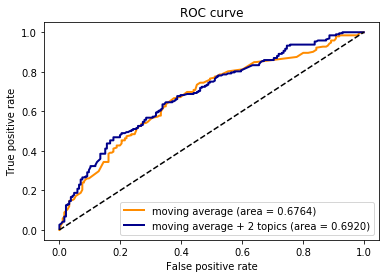

In [365]:
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange',
                 lw=2, label='moving average (area = %0.4f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='darkblue',
                 lw=2, label='moving average + 2 topics (area = %0.4f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

## Sentimental Analysis

In [165]:
from textblob import TextBlob

In [166]:
y_polarity_train = np.zeros(train.shape[0])
y_subjectivity_train = np.zeros(train.shape[0])
y_polarity_test = np.zeros(test.shape[0])
y_subjectivity_test = np.zeros(test.shape[0])

In [167]:
for i in range(len(train_vob)):
    blob = TextBlob(' '.join(train_vob[i]))
    y_polarity_train[i] = blob.sentiment.polarity
    y_subjectivity_train[i] = blob.sentiment.subjectivity

In [168]:
for i in range(len(test_vob)):
    blob = TextBlob(' '.join(test_vob[i]))
    y_polarity_test[i] = blob.sentiment.polarity
    y_subjectivity_test[i] = blob.sentiment.subjectivity

(array([   5.,   20.,   56.,  179.,  367.,  487.,  334.,  128.,   24.,   11.]),
 array([-0.20219697, -0.16265909, -0.12312121, -0.08358333, -0.04404545,
        -0.00450758,  0.0350303 ,  0.07456818,  0.11410606,  0.15364394,
         0.19318182]),
 <a list of 10 Patch objects>)

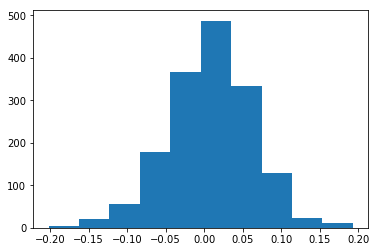

In [169]:
plt.hist(y_polarity_train)

(array([  11.,   80.,  211.,  427.,  484.,  285.,   85.,   21.,    4.,    3.]),
 array([ 0.14830586,  0.19651099,  0.24471612,  0.29292125,  0.34112637,
         0.3893315 ,  0.43753663,  0.48574176,  0.53394689,  0.58215201,
         0.63035714]),
 <a list of 10 Patch objects>)

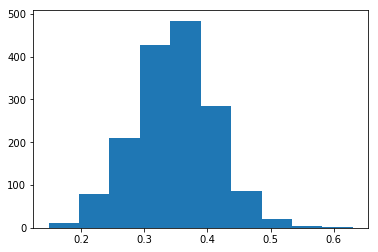

In [170]:
plt.hist(y_subjectivity_train)

In [224]:
y_polarity_train = 1* (y_polarity_train>0)

In [225]:
y_polarity_test = 1* (y_polarity_test>0)

In [226]:
np.sum(y_polarity_test) / float(len(y_polarity_test))

0.6693121693121693

In [227]:
# logistic Regression + polarity

print()
print('2 topics')
print(roc_auc_score(y_polarity_test, LogisticRegression().fit(X_train2p,y_polarity_train).predict_proba(X_test2p)[:,1]))
print(accuracy_score(LogisticRegression().fit(X_train2p,y_polarity_train).predict(X_test2p),y_polarity_test))

print()
print('10 topics')
print(roc_auc_score(y_polarity_test, LogisticRegression().fit(X_train10p,y_polarity_train).predict_proba(X_test10p)[:,1]))
print(accuracy_score(LogisticRegression().fit(X_train10p,y_polarity_train).predict(X_test10p),y_polarity_test))

print()
print('20 topics')
print(roc_auc_score(y_polarity_test, LogisticRegression().fit(X_train20p,y_polarity_train).predict_proba(X_test20p)[:,1]))
print(accuracy_score(LogisticRegression().fit(X_train20p,y_polarity_train).predict(X_test20p),y_polarity_test))

print()
print('30 topics')
print(roc_auc_score(y_polarity_test, LogisticRegression().fit(X_train30p,y_polarity_train).predict_proba(X_test30p)[:,1]))
print(accuracy_score(LogisticRegression().fit(X_train30p,y_polarity_train).predict(X_test30p),y_polarity_test))


2 topics
0.498339920949
0.669312169312

10 topics
0.509438735178
0.661375661376

20 topics
0.558197628458
0.671957671958

30 topics
0.521201581028
0.650793650794


In [228]:
# SVM + polarity
print()
print('2 topics')
print(roc_auc_score(y_polarity_test, SVC(probability=True).fit(X_train2p,y_polarity_train).predict_proba(X_test2p)[:,1]))
print(accuracy_score(SVC().fit(X_train2p,y_polarity_train).predict(X_test2p),y_polarity_test))

print()
print('10 topics')
print(roc_auc_score(y_polarity_test, SVC(probability=True).fit(X_train10p,y_polarity_train).predict_proba(X_test10p)[:,1]))
print(accuracy_score(SVC().fit(X_train10p,y_polarity_train).predict(X_test10p),y_polarity_test))

print()
print('20 topics')
print(roc_auc_score(y_polarity_test, SVC(probability=True).fit(X_train20p,y_polarity_train).predict_proba(X_test20p)[:,1]))
print(accuracy_score(SVC().fit(X_train20p,y_polarity_train).predict(X_test20p),y_polarity_test))

print()
print('30 topics')
print(roc_auc_score(y_polarity_test, SVC(probability=True).fit(X_train30p,y_polarity_train).predict_proba(X_test30p)[:,1]))
print(accuracy_score(SVC().fit(X_train30p,y_polarity_train).predict(X_test30p),y_polarity_test))


2 topics
0.478482213439
0.669312169312

10 topics
0.533217391304
0.669312169312

20 topics
0.435415019763
0.669312169312

30 topics
0.454545454545
0.669312169312


In [263]:
# RandomForest + polarity
print()
print('2 topics')
print(roc_auc_score(y_polarity_test, RandomForestClassifier(random_state=0).fit(X_train2p,y_polarity_train).predict_proba(X_test2p)[:,1]))
print(accuracy_score(RandomForestClassifier().fit(X_train2p,y_polarity_train).predict(X_test2p),y_polarity_test))

print()
print('10 topics')
print(roc_auc_score(y_polarity_test, RandomForestClassifier(random_state=0).fit(X_train10p,y_polarity_train).predict_proba(X_test10p)[:,1]))
print(accuracy_score(RandomForestClassifier(random_state=0).fit(X_train10p,y_polarity_train).predict(X_test10p),y_polarity_test))

print()
print('20 topics')
print(roc_auc_score(y_polarity_test, RandomForestClassifier(random_state=0).fit(X_train20p,y_polarity_train).predict_proba(X_test20p)[:,1]))
print(accuracy_score(RandomForestClassifier(random_state=0).fit(X_train20p,y_polarity_train).predict(X_test20p),y_polarity_test))

print()
print('30 topics')
print(roc_auc_score(y_polarity_test, RandomForestClassifier(random_state=0).fit(X_train30p,y_polarity_train).predict_proba(X_test30p)[:,1]))
print(accuracy_score(RandomForestClassifier(random_state=0).fit(X_train30p,y_polarity_train).predict(X_test30p),y_polarity_test))


2 topics
0.58837944664
0.579365079365

10 topics
0.521517786561
0.544973544974

20 topics
0.469296442688
0.502645502646

30 topics
0.586292490119
0.57671957672


[0.51916882127355024, 0.51916882127355024, 0.52260938662511702, 0.52265937682662378, 0.51090454549075381, 0.51045545165426309]
Time Series Cross Validation:
Best parameter: {'n_estimators': 30, 'min_samples_leaf': 3}
Best Accuracy:0.525704809287
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
Validation Set:
Best Accuracy:0.582010582011
Confusion Matrix:
[[ 70  55]
 [103 150]]


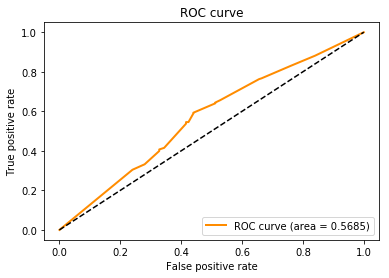

In [265]:
tune_rf(X_train2p,y_polarity_train,X_test2p,y_polarity_test,True)

In [230]:
from sklearn.neighbors import KNeighborsClassifier
# KNN + polarity
print()
print('2 topics')
print(roc_auc_score(y_polarity_test, KNeighborsClassifier().fit(X_train2p,y_polarity_train).predict_proba(X_test2p)[:,1]))
print(accuracy_score(KNeighborsClassifier().fit(X_train2p,y_polarity_train).predict(X_test2p),y_polarity_test))

print()
print('10 topics')
print(roc_auc_score(y_polarity_test, KNeighborsClassifier().fit(X_train10p,y_polarity_train).predict_proba(X_test10p)[:,1]))
print(accuracy_score(KNeighborsClassifier().fit(X_train10p,y_polarity_train).predict(X_test10p),y_polarity_test))

print()
print('20 topics')
print(roc_auc_score(y_polarity_test, KNeighborsClassifier().fit(X_train20p,y_polarity_train).predict_proba(X_test20p)[:,1]))
print(accuracy_score(KNeighborsClassifier().fit(X_train20p,y_polarity_train).predict(X_test20p),y_polarity_test))

print()
print('30 topics')
print(roc_auc_score(y_polarity_test, KNeighborsClassifier().fit(X_train30p,y_polarity_train).predict_proba(X_test30p)[:,1]))
print(accuracy_score(KNeighborsClassifier().fit(X_train30p,y_polarity_train).predict(X_test30p),y_polarity_test))


2 topics
0.533233201581
0.560846560847

10 topics
0.534529644269
0.566137566138

20 topics
0.521011857708
0.589947089947

30 topics
0.530750988142
0.560846560847


In [200]:
np.corrcoef(y_ret_train,y_polarity_train)

array([[ 1.        ,  0.02140723],
       [ 0.02140723,  1.        ]])

In [209]:
for i in range(X_train20p.shape[1]):
    print(np.corrcoef(y_polarity_train,X_train20p[:,i])[0,1])

-0.0020068292609
-0.000651088597056
0.0557927420656
0.0275585713376
-0.00307139416922
-0.0181815713422
0.00762024000764
0.0291703792675
0.0223347887956
-0.0427676802399
0.0124871334399
0.038498357141
0.00653604920158
-0.00618827404948
0.0258766426198
0.00357691283926
-0.0267392677834
-0.0413933513794
-0.0202967172659
-0.00147810894391
